# Two particles in an infinite square well
Ted Corcovilos, 2021

Here I reproduce the figures in Ch. 13 of McIntyre for two particles in an infinite square well.

I'm assuming the following values for the constants:
$$
\hbar = 1,\qquad
m =1, \qquad
L = \pi
$$

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In the cell below, uncomment the case you want to plot.

In [3]:
# Expressions for the joint pdfs of the 4 cases

#distinguishable (known energies)
p1 = lambda x1, x2: 2./np.pi**2 *(np.sin(x1)**2*np.sin(2.*x2)**2 )
# distinguishable (mixture)
p2 = lambda x1, x2: 2./np.pi**2 *(np.sin(x1)**2*np.sin(2.*x2)**2 + np.sin(2.*x1)**2*np.sin(x2)**2)
# indistinguishable symmetric
p3 = lambda x1, x2: 1./np.pi**2 *(np.sin(x1)*np.sin(2.*x2) + np.sin(2.*x1)*np.sin(x2))**2
# indistinguishable antisymmetric
p4 = lambda x1, x2: 1./np.pi**2 *(np.sin(x1)*np.sin(2.*x2) - np.sin(2.*x1)*np.sin(x2))**2

# make lists of the functions and names
p= [p1, p2, p3, p4]
n = ["Distinguishable (known energies)",
    "Distinguishable (mixture)",
    "Indistinguishable symmetric",
    "Indistinguishable anti-symmetric"]

In [4]:
# prepare the grid of coordinates for plotting
x1grid,x2grid=np.meshgrid(np.linspace(0.,np.pi,50),np.linspace(0.,np.pi,50))

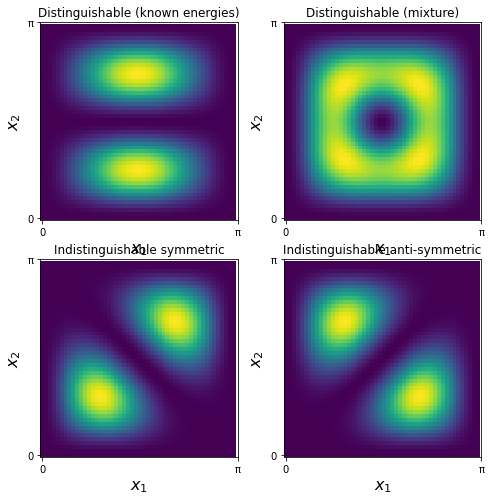

In [5]:
# plot as an intensity plot
fig, axs = plt.subplots(2, 2, figsize=(8,8))
axs = axs.flatten()
for i in range(4):
    axs[i].imshow(p[i](x1grid,x2grid), origin='lower')
    axs[i].set_xlabel("$x_1$",size=16)
    axs[i].set_ylabel("$x_2$",size=16)
    axs[i].set_title(n[i])
    axs[i].set_aspect(1)
    axs[i].set_xticks([0,50])
    axs[i].set_xticklabels(['0','π'])
    axs[i].set_yticks([0,50])
    axs[i].set_yticklabels(['0','π'])


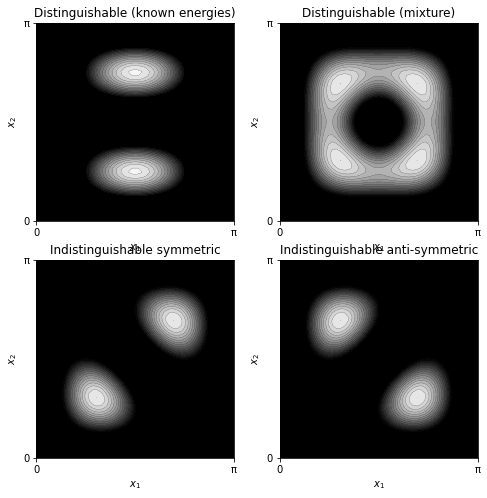

In [6]:
# plot as contour plots (trying to match style of McIntyre)
fig, axs = plt.subplots(2, 2, figsize=(8,8))
axs = axs.flatten()
for i in range(4):
    axs[i].contourf(x1grid,x2grid,p[i](x1grid,x2grid),cmap='gray',levels=25,vmin=0.1)
    axs[i].contour(x1grid,x2grid,p[i](x1grid,x2grid),colors='black',levels=25,linewidths=0.2,vmin=0.1)
    axs[i].set_xlabel('$x_1$')
    axs[i].set_ylabel('$x_2$')
    axs[i].set_title(n[i])
    axs[i].set_aspect(1)
    axs[i].set_xticks([0,np.pi])
    axs[i].set_xticklabels(['0','π'])
    axs[i].set_yticks([0,np.pi])
    axs[i].set_yticklabels(['0','π'])
plt.savefig('DISW-contour.png')

The RMS distance between the particles is given by
$$
\mathrm{RMS} = \sqrt{\left<(x_1-x_2)^2 \right>}
= \left[ \int\limits_{0}^{\pi} \int\limits_{0}^{\pi}
(x_1-x_2)^2 p(x_1,x_2)\,dx_1\,dx_2
\right]^{1/2}
$$

Because I didn't normalize the pdf in the definition, I'll have to also divide the expectation value by $ \int_0^\pi \int_0^\pi p(x_1,x_2)\,dx_1\,dx_2$.

In [7]:
# calculate RMS distances for each case. Approximate integrals by sums.
rms = [np.sqrt(np.sum((x1grid-x2grid)**2*f(x1grid,x2grid))/np.sum(f(x1grid,x2grid))) for f in p]

In [8]:
print("RMS distances")
for i in range(4):
    print("{}: {:.3f}".format(n[i],rms[i]))

RMS distances
Distinguishable (known energies): 1.010
Distinguishable (mixture): 1.010
Indistinguishable symmetric: 0.616
Indistinguishable anti-symmetric: 1.289
